In [10]:
library(tidyverse)
library(cowplot)
library(scales)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



In [20]:
# Loading in the processed Cleveland heart disease dataset.

URL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

cleveland_data <- read_csv(URL, col_names=FALSE)
colnames(cleveland_data) <- c("age", "sex", "cp", "trestbps", 
                              "chol", "fbs", "restecg", "thalach", 
                              "exang", "oldpeak", "slope", "ca", "thal", "num")
cleveland_data <- cleveland_data |>
                    mutate(num = as_factor(num))
cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [21]:
# splitting the heart data into training and testing datasets

heart_split <- initial_split(cleveland_data, prop = 0.75, strata = num)

training_data <- training(heart_split)
training_data

testing_data <- testing(heart_split)
testing_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
54,1,4,122,286,0,2,116,1,3.2,2,2.0,3.0,3
52,1,4,125,212,0,0,168,0,1.0,1,2.0,7.0,3
55,0,4,128,205,0,1,130,1,2.0,2,1.0,7.0,3


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
44,1,2,120,263,0,0,173,0,0.0,1,0.0,7.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0,3
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


! Fold1: internal:
  No observations were detected in `truth` for level(s): '4'
  Computation will proceed by ignoring those levels.



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5301028,5,0.02620670,Preprocessor1_Model01
3,accuracy,multiclass,0.5786310,5,0.02069217,Preprocessor1_Model02
4,accuracy,multiclass,0.5736016,5,0.02293739,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
11,accuracy,multiclass,0.5606465,5,0.011915680,Preprocessor1_Model08
13,accuracy,multiclass,0.5466931,5,0.008891402,Preprocessor1_Model09
15,accuracy,multiclass,0.5468822,5,0.011319397,Preprocessor1_Model10


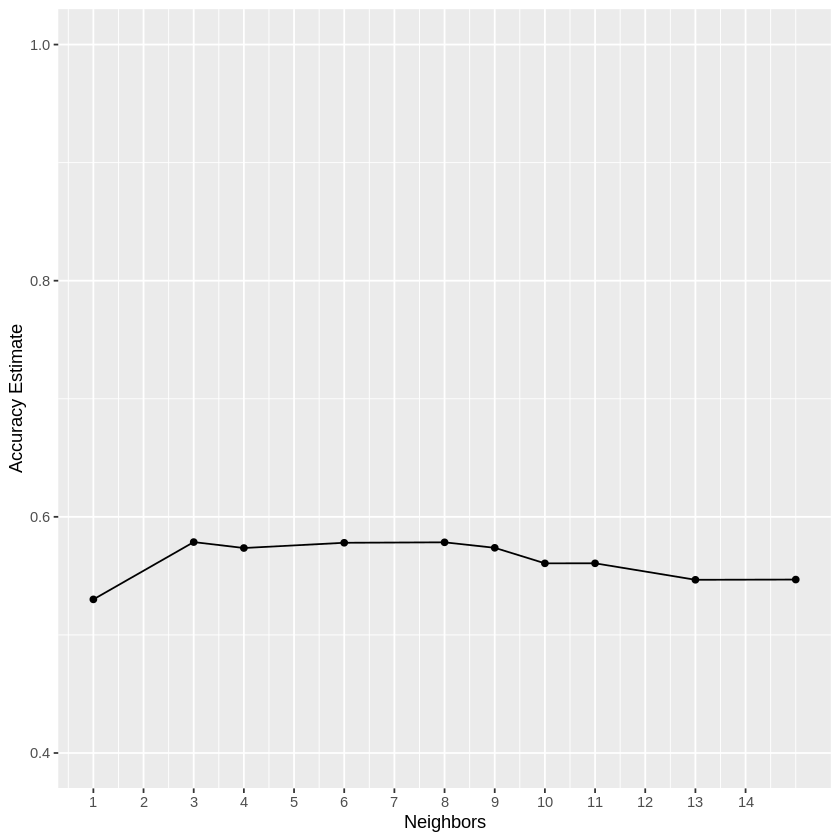

In [31]:
knn_recipe <- recipe(num ~ ., data = training_data)


train_vfold <- vfold_cv(training_data, v = 5, strata = num)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_fit <- workflow() |>
                add_recipe(knn_recipe) |>
                add_model(knn_tune) |>
                tune_grid(resamples = train_vfold, grid = 10)

training_results <- collect_metrics(knn_fit)

accuracies <- training_results |>
                filter(.metric == "accuracy")
accuracies

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                        geom_point() +
                        geom_line() +
                        labs(x = "Neighbors", y = "Accuracy Estimate") +
                        scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
                        scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
cross_val_plot

In [32]:
set.seed(1326) 

# your code here
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
                set_engine("kknn") |>
                set_mode("classification")
heart_spec

heart_fit <- workflow() |>
                add_recipe(knn_recipe) |>
                add_model(heart_spec) |>
                fit(data = training_data)
heart_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4533333
Best kernel: rectangular
Best k: 3

In [ ]:
heart_predictions <- predict(mnist_fit, testing_set) |>
                        bind_cols(testing_set)
heart_predictions

heart_metrics <- mnist_predictions |>
                    metrics(truth = .pred_class, estimate = y)
heart_metrics

heart_conf_mat <- mnist_predictions |>
                    conf_mat(truth = .pred_class, estimate = y)
heart_conf_mat